In [1]:
import time
import geopandas as gpd
from RedistrictingMarkovChain import *

STEPS = [100]

start_time = time.time()

print("Starting graph load")
ny_graph = Graph.from_file("./new_states/shapefiles/vt_election_df.shp")
blocks_df = gpd.read_file("./new_states/shapefiles/vt_election_df.shp")
print("Graph loaded")

Starting graph load
Graph loaded


/Users/rishab/Library/Python/3.9/lib/python/site-packages/gerrychain/graph/graph.py:179: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas = df.geometry.area.to_dict()
/Users/rishab/Library/Python/3.9/lib/python/site-packages/gerrychain/graph/graph.py:311: UserWarning: NA values found in column TOTPOP!
  warnings.warn("NA values found in column {}!".format(column))
/Users/rishab/Library/Python/3.9/lib/python/site-packages/gerrychain/graph/graph.py:311: UserWarning: NA values found in column HISP!
  warnings.warn("NA values found in column {}!".format(column))
/Users/rishab/Library/Python/3.9/lib/python/site-packages/gerrychain/graph/graph.py:311: UserWarning: NA values found in column NH_WHITE!
  warnings.warn("NA values found in column {}!".format(column))
/Users/rishab/Library/Python/3.9/lib/python/site-packages/gerrychain/graph/graph.py:311: User

In [2]:
elections = [
    ["G20PRE", "G20PRED", "G20PRER"],  ## election for previous graphs
    # ["GOV18", "G18GOVD", "G18GOVR"],
    # ["SOS18", "G18SOSD", "G18SOSR"],
    # ["ATG18", "G18ATGD", "G18ATGR"]
]

In [3]:
ny_graph.nodes[0]

{'boundary_node': False,
 'area': 0.003978406630999918,
 'STATEFP20': '50',
 'COUNTYFP20': '001',
 'NAME20': 'Whiting',
 'G20PRED': 124,
 'G20PRER': 84,
 'TOTPOP': 405.0,
 'HISP': 8.0,
 'NH_WHITE': 370.0,
 'NH_BLACK': 3.0,
 'NH_AMIN': 1.0,
 'NH_ASIAN': 1.0,
 'NH_NHPI': 0.0,
 'NH_OTHER': 3.0,
 'NH_2MORE': 19.0,
 'VAP': 315.0,
 'HVAP': 5.0,
 'WVAP': 292.0,
 'BVAP': 2.0,
 'AMINVAP': 1.0,
 'ASIANVAP': 1.0,
 'NHPIVAP': 0.0,
 'OTHERVAP': 1.0,
 '2MOREVAP': 13.0,
 'SEN': 'ADD',
 'geometry': <POLYGON ((-73.242 43.905, -73.24 43.905, -73.237 43.905, -73.236 43.905, -7...>}

Walking the ensemble
Walk complete


/Users/rishab/Library/Python/3.9/lib/python/site-packages/gerrychain/updaters/tally.py:100: UserWarning: ignoring nan encountered at node '274' for attribute 'population' with fields ['TOTPOP']
  warnings.warn(
/Users/rishab/Library/Python/3.9/lib/python/site-packages/gerrychain/updaters/tally.py:100: UserWarning: ignoring nan encountered at node '281' for attribute 'population' with fields ['TOTPOP']
  warnings.warn(
/Users/rishab/Library/Python/3.9/lib/python/site-packages/gerrychain/updaters/tally.py:100: UserWarning: ignoring nan encountered at node '283' for attribute 'population' with fields ['TOTPOP']
  warnings.warn(
/Users/rishab/Library/Python/3.9/lib/python/site-packages/gerrychain/updaters/tally.py:100: UserWarning: ignoring nan encountered at node '279' for attribute 'population' with fields ['TOTPOP']
  warnings.warn(
/Users/rishab/Library/Python/3.9/lib/python/site-packages/gerrychain/updaters/tally.py:100: UserWarning: ignoring nan encountered at node '277' for attribut

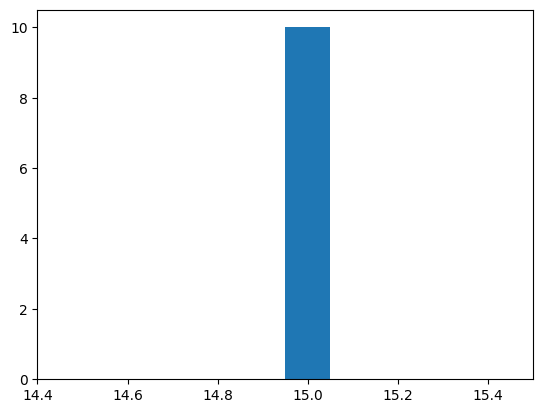

In [4]:

pop_tols = [0.7]

ny_markov_chain = RedistrictingMarkovChain(ny_graph,
                                            len(set(blocks_df['SEN'])),
                                            "SEN",
                                            elections[0][0],
                                            elections[0][1],
                                            elections[0][2],
                                            "TOTPOP",
                                            "HISP",
                                            0.7)
ny_markov_chain.init_partition()

ny_markov_chain.init_markov_chain(steps=10)
cutedge_ensemble, lmaj_ensemble, dem_win_ensemble = ny_markov_chain.walk_the_run()

plot_histograms(dem_win_ensemble,
                f"vt_histograms/propose_random_flip_dem_win_ensemble_{10}_{0.7}_{elections[0][0]}.png")


            # cutedge_ensemble, lmaj_ensemble, dem_win_ensemble = ny_markov_chain.walk_the_run()

            # # Histograms
            # # 1. Cut edge
            # # plot_histograms(cutedge_ensemble,
            # #                 f"wa_histograms/propose_random_flip_cutedge_ensemble_{step}_{pop_tol}_{election[0]}.png")
            # # # 2. Majority-Latino districts
            # # plot_histograms(lmaj_ensemble,
            # #                 f"wa_histograms/propose_random_flip_lmaj_ensemble_{step}_{pop_tol}_{election[0]}.png")
            # # 3. Democratic-won districts
            # plot_histograms(dem_win_ensemble,
            #                 f"wa_histograms/propose_random_flip_dem_win_ensemble_{step}_{pop_tol}_{election[0]}.png")

            # end_time = time.time()
            # print("The time of execution of above program for step-count ", step, " for election ", election[0], "is :",
            #       (end_time - start_time) / 60, "mins")